## Klasifikasi Text Mining menggunakan Naive Bayes

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/AMS2023')

In [ ]:
# !pip install ekphrasis

In [ ]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

d:\STKI09\venv\Lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams C:\Users\LENOVO\.ekphrasis\stats\twitter\counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams C:\Users\LENOVO\.ekphrasis\stats\twitter\counts_2grams.txt
Reading twitter - 1grams ...


d:\STKI09\venv\Lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [3]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [5]:
df = pd.read_csv('Dataset_Sentimen_Emosi.csv')

In [6]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


karena kita hanya ingin fokus di Sentimen analysis, maka kita hanya pakai `Sentimen` sebagai target class nya **class**

In [10]:
df = df.drop(['label'], axis=1)

In [11]:
df.head()

,tweet
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [12]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\w'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\w'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8280\498415386.py:17: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('\s+',' ',text)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8280\498415386.py:23: SyntaxWarning: invalid escape sequence '\w'
  return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())


In [14]:
final_string = []
for text in df['tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [ ]:
df["step01"] = final_string

In [16]:
df.head(1)

,tweet,step01
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4401 non-null   object
 1   step01  4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [19]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [20]:
df_new = df[~df.isin(df_hapus)].dropna()

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4401 non-null   object
 1   step01  4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [22]:
# token
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [24]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [25]:
df_new.head(10)

,tweet,step01,tokens
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...,"[soal, jln, jatibaru, polisi, tdk, bs, allcaps..."
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibaru bagian dari wilayah tn abang peng...,"[jln, jatibaru, bagian, dari, wilayah, tn, aba..."
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam number bata...,"[sharing, pengalaman, aja, kemarin, jam, numbe..."
5,"Dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,"[dari, sekian, banyak, thread, yang, aku, baca..."
6,Sharing sama temen tuh emg guna bgt. Disaat lu...,sharing sama temen tuh emg guna bgt disaat lu ...,"[sharing, sama, temen, tuh, emg, guna, bgt, di..."
7,Orang lain kalau pake ponco itu buat jas hujan...,orang lain kalau pake ponco itu buat jas hujan...,"[orang, lain, kalau, pake, ponco, itu, buat, j..."
8,"Contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,"[contoh, mereka, yg, gemar, menyudutkan, teria..."
9,Pulang udah H-4 lebaran dilema sekali. Seperti...,pulang udah number lebaran dilema sekali seper...,"[pulang, udah, number, lebaran, dilema, sekali..."


In [28]:
import pandas as pd

# Kamus perbaikan kata (alay -> baku)
data = {
    "before": [
        "gk", "ga", "nggak", "tdk",
        "bgt", "bgtt",
        "yg", "dgn", "dr", "utk",
        "krn", "aja", "sm", "dlm", "pd"
    ],
    "after": [
        "tidak", "tidak", "tidak", "tidak",
        "banget", "banget",
        "yang", "dengan", "dari", "untuk",
        "karena", "saja", "sama", "dalam", "pada"
    ]
}

# Buat DataFrame
kamus_df = pd.DataFrame(data)

# Simpan ke Excel
kamus_df.to_excel("kamus_perbaikan_kata.xlsx", index=False)

print("File kamus_perbaikan_kata.xlsx berhasil dibuat ✅")


File kamus_perbaikan_kata.xlsx berhasil dibuat ✅


In [30]:
normalized_word = pd.read_excel("kamus_perbaikan_kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df_new['tokens_perbaikan'] = df_new['tokens'].apply(normalized_term)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8280\3278828234.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8280\3278828234.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


In [31]:
df_new.head()

,tweet,step01,tokens,tokens_perbaikan
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...,"[soal, jln, jatibaru, polisi, tdk, bs, allcaps...","[soal, jln, jatibaru, polisi, tidak, bs, allca..."
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibaru bagian dari wilayah tn abang peng...,"[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, bagian, dari, wilayah, tn, aba..."
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam number bata...,"[sharing, pengalaman, aja, kemarin, jam, numbe...","[sharing, pengalaman, saja, kemarin, jam, numb..."


In [32]:
df_new.iloc[0].tokens

['soal',
 'jln',
 'jatibaru',
 'polisi',
 'tdk',
 'bs',
 'allcaps',
 'gertak',
 'allcaps',
 'gubernur',
 'emangny',
 'polisi',
 'tdk',
 'ikut',
 'pmbhasan',
 'jgn',
 'berpolitik',
 'pengaturan',
 'wilayah',
 'hak',
 'gubernur',
 'persoalan',
 'tn',
 'abang',
 'soal',
 'turun',
 'temurun',
 'pelik',
 'perlu',
 'kesabaran',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'url',
 'allcaps']

In [33]:
df_new.iloc[0].tokens_perbaikan

['soal',
 'jln',
 'jatibaru',
 'polisi',
 'tidak',
 'bs',
 'allcaps',
 'gertak',
 'allcaps',
 'gubernur',
 'emangny',
 'polisi',
 'tidak',
 'ikut',
 'pmbhasan',
 'jgn',
 'berpolitik',
 'pengaturan',
 'wilayah',
 'hak',
 'gubernur',
 'persoalan',
 'tn',
 'abang',
 'soal',
 'turun',
 'temurun',
 'pelik',
 'perlu',
 'kesabaran',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'url',
 'allcaps']

In [34]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stopword = nltk.corpus.stopwords.words('indonesian')

def remove_stopwords(text):
  text = [word for word in text if word not in stopword]
  return text

df_new['Stop_removal'] = df_new['tokens_perbaikan'].apply(lambda x: remove_stopwords(x))
df_new

,tweet,step01,tokens,tokens_perbaikan,Stop_removal
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...,"[soal, jln, jatibaru, polisi, tdk, bs, allcaps...","[soal, jln, jatibaru, polisi, tidak, bs, allca...","[jln, jatibaru, polisi, bs, allcaps, gertak, a..."
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras..."
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibaru bagian dari wilayah tn abang peng...,"[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, wilayah, tn, abang, pengaturan..."
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam number bata...,"[sharing, pengalaman, aja, kemarin, jam, numbe...","[sharing, pengalaman, saja, kemarin, jam, numb...","[sharing, pengalaman, kemarin, jam, number, ba..."
...,...,...,...,...,...
4396,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahukah kamu bahwa saat itu papa memejamkan ma...,"[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, kamu, bahwa, saat, itu, papa, memeja...","[tahukah, papa, memejamkan, matanya, menahan, ..."
4397,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulitnya menetapkan calon wapresnya jokowi di ...,"[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wapresnya, jokow...","[sulitnya, menetapkan, calon, wapresnya, jokow..."
4398,"5. masa depannya nggak jelas. lha iya, gimana ...",number masa depannya nggak jelas lha iya giman...,"[number, masa, depannya, nggak, jelas, lha, iy...","[number, masa, depannya, tidak, jelas, lha, iy...","[number, depannya, lha, iya, gimana, coba, lul..."
4399,[USERNAME] dulu beneran ada mahasiswa Teknik U...,allcaps username allcaps dulu beneran ada maha...,"[allcaps, username, allcaps, dulu, beneran, ad...","[allcaps, username, allcaps, dulu, beneran, ad...","[allcaps, username, allcaps, beneran, mahasisw..."


In [36]:
df_new.iloc[0].tokens_perbaikan

['soal',
 'jln',
 'jatibaru',
 'polisi',
 'tidak',
 'bs',
 'allcaps',
 'gertak',
 'allcaps',
 'gubernur',
 'emangny',
 'polisi',
 'tidak',
 'ikut',
 'pmbhasan',
 'jgn',
 'berpolitik',
 'pengaturan',
 'wilayah',
 'hak',
 'gubernur',
 'persoalan',
 'tn',
 'abang',
 'soal',
 'turun',
 'temurun',
 'pelik',
 'perlu',
 'kesabaran',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'url',
 'allcaps']

In [37]:
df_new.iloc[0].Stop_removal

['jln',
 'jatibaru',
 'polisi',
 'bs',
 'allcaps',
 'gertak',
 'allcaps',
 'gubernur',
 'emangny',
 'polisi',
 'pmbhasan',
 'jgn',
 'berpolitik',
 'pengaturan',
 'wilayah',
 'hak',
 'gubernur',
 'tn',
 'abang',
 'turun',
 'temurun',
 'pelik',
 'kesabaran',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'username',
 'allcaps',
 'allcaps',
 'url',
 'allcaps']

In [38]:
i=0
final_string_tokens = []
for text in df_new['Stop_removal'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [39]:
df_new["step02"] = final_string_tokens

In [40]:
df_new.head()

,tweet,step01,tokens,tokens_perbaikan,Stop_removal,step02
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...,"[soal, jln, jatibaru, polisi, tdk, bs, allcaps...","[soal, jln, jatibaru, polisi, tidak, bs, allca...","[jln, jatibaru, polisi, bs, allcaps, gertak, a...",jln jatibaru polisi bs allcaps gertak allcaps ...
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras...",cewe lho kayaknya rasain sibuk jaga rasain sak...
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...",kepingin gudeg mbarek bu hj amad foto google s...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibaru bagian dari wilayah tn abang peng...,"[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, wilayah, tn, abang, pengaturan...",jln jatibaru wilayah tn abang pengaturan wilay...
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam number bata...,"[sharing, pengalaman, aja, kemarin, jam, numbe...","[sharing, pengalaman, saja, kemarin, jam, numb...","[sharing, pengalaman, kemarin, jam, number, ba...",sharing pengalaman kemarin jam number batalin ...


In [36]:
# !pip install sastrawi

In [42]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [43]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [44]:
df_new["ProcessedText"] = final_string

In [45]:
df_new.head(10)

,tweet,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jln jatibaru polisi tdk bs allcaps gertak...,"[soal, jln, jatibaru, polisi, tdk, bs, allcaps...","[soal, jln, jatibaru, polisi, tidak, bs, allca...","[jln, jatibaru, polisi, bs, allcaps, gertak, a...",jln jatibaru polisi bs allcaps gertak allcaps ...,jln jatibaru polisi bs allcaps gertak allcaps ...
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sesama cewe lho kayaknya harusnya bisa lebih r...,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[sesama, cewe, lho, kayaknya, harusnya, bisa, ...","[cewe, lho, kayaknya, rasain, sibuk, jaga, ras...",cewe lho kayaknya rasain sibuk jaga rasain sak...,cewe lho kayak rasain sibuk jaga rasain sakit ...
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto dari goo...,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...","[kepingin, gudeg, mbarek, bu, hj, amad, foto, ...",kepingin gudeg mbarek bu hj amad foto google s...,kepingin gudeg mbarek bu hj amad foto google s...
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibaru bagian dari wilayah tn abang peng...,"[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, bagian, dari, wilayah, tn, aba...","[jln, jatibaru, wilayah, tn, abang, pengaturan...",jln jatibaru wilayah tn abang pengaturan wilay...,jln jatibaru wilayah tn abang atur wilayah tgg...
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing pengalaman aja kemarin jam number bata...,"[sharing, pengalaman, aja, kemarin, jam, numbe...","[sharing, pengalaman, saja, kemarin, jam, numb...","[sharing, pengalaman, kemarin, jam, number, ba...",sharing pengalaman kemarin jam number batalin ...,sharing alam kemarin jam number batalin tiket ...
5,"Dari sekian banyak thread yang aku baca, threa...",dari sekian banyak thread yang aku baca thread...,"[dari, sekian, banyak, thread, yang, aku, baca...","[dari, sekian, banyak, thread, yang, aku, baca...","[sekian, thread, baca, thread, aneh, sih, penu...",sekian thread baca thread aneh sih penulisan s...,sekian thread baca thread aneh sih tulis sumpa...
6,Sharing sama temen tuh emg guna bgt. Disaat lu...,sharing sama temen tuh emg guna bgt disaat lu ...,"[sharing, sama, temen, tuh, emg, guna, bgt, di...","[sharing, sama, temen, tuh, emg, guna, banget,...","[sharing, temen, tuh, emg, banget, disaat, lu,...",sharing temen tuh emg banget disaat lu ngerasa...,sharing temen tuh emg banget saat lu ngerasa l...
7,Orang lain kalau pake ponco itu buat jas hujan...,orang lain kalau pake ponco itu buat jas hujan...,"[orang, lain, kalau, pake, ponco, itu, buat, j...","[orang, lain, kalau, pake, ponco, itu, buat, j...","[orang, pake, ponco, jas, hujan, pake, kasur, ...",orang pake ponco jas hujan pake kasur ya gara2...,orang pake ponco jas hujan pake kasur ya gara2...
8,"Contoh mereka yg gemar menyudutkan, teriak pal...",contoh mereka yg gemar menyudutkan teriak pali...,"[contoh, mereka, yg, gemar, menyudutkan, teria...","[contoh, mereka, yang, gemar, menyudutkan, ter...","[contoh, gemar, menyudutkan, teriak, toleran, ...",contoh gemar menyudutkan teriak toleran tp gem...,contoh gemar sudut teriak toleran tp gemar tud...
9,Pulang udah H-4 lebaran dilema sekali. Seperti...,pulang udah number lebaran dilema sekali seper...,"[pulang, udah, number, lebaran, dilema, sekali...","[pulang, udah, number, lebaran, dilema, sekali...","[pulang, udah, number, lebaran, dilema, apa2, ...",pulang udah number lebaran dilema apa2 dirumah...,pulang udah number lebaran dilema apa2 rumah l...


## simpan hasil preprocessing

In [46]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [47]:
import pandas as pd
import numpy as np

In [48]:
dataset = pd.read_csv('clean_dataset_part01.csv',sep=";")

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        4401 non-null   int64 
 1   tweet             4401 non-null   object
 2   step01            4401 non-null   object
 3   tokens            4401 non-null   object
 4   tokens_perbaikan  4401 non-null   object
 5   Stop_removal      4401 non-null   object
 6   step02            4401 non-null   object
 7   ProcessedText     4401 non-null   object
dtypes: int64(1), object(7)
memory usage: 275.2+ KB


In [50]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [51]:
dataset_feature.head(10)

0    jln jatibaru polisi bs allcaps gertak allcaps ...
1    cewe lho kayak rasain sibuk jaga rasain sakit ...
2    kepingin gudeg mbarek bu hj amad foto google s...
3    jln jatibaru wilayah tn abang atur wilayah tgg...
4    sharing alam kemarin jam number batalin tiket ...
5    sekian thread baca thread aneh sih tulis sumpa...
6    sharing temen tuh emg banget saat lu ngerasa l...
7    orang pake ponco jas hujan pake kasur ya gara2...
8    contoh gemar sudut teriak toleran tp gemar tud...
9    pulang udah number lebaran dilema apa2 rumah l...
Name: ProcessedText, dtype: object

In [56]:
dataset_label = dataset['tweet']

In [57]:
dataset_label.head(10)

0    Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...
1    Sesama cewe lho (kayaknya), harusnya bisa lebi...
2    Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3    Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...
4    Sharing pengalaman aja, kemarin jam 18.00 bata...
5    Dari sekian banyak thread yang aku baca, threa...
6    Sharing sama temen tuh emg guna bgt. Disaat lu...
7    Orang lain kalau pake ponco itu buat jas hujan...
8    Contoh mereka yg gemar menyudutkan, teriak pal...
9    Pulang udah H-4 lebaran dilema sekali. Seperti...
Name: tweet, dtype: object

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipykernel_481906/1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


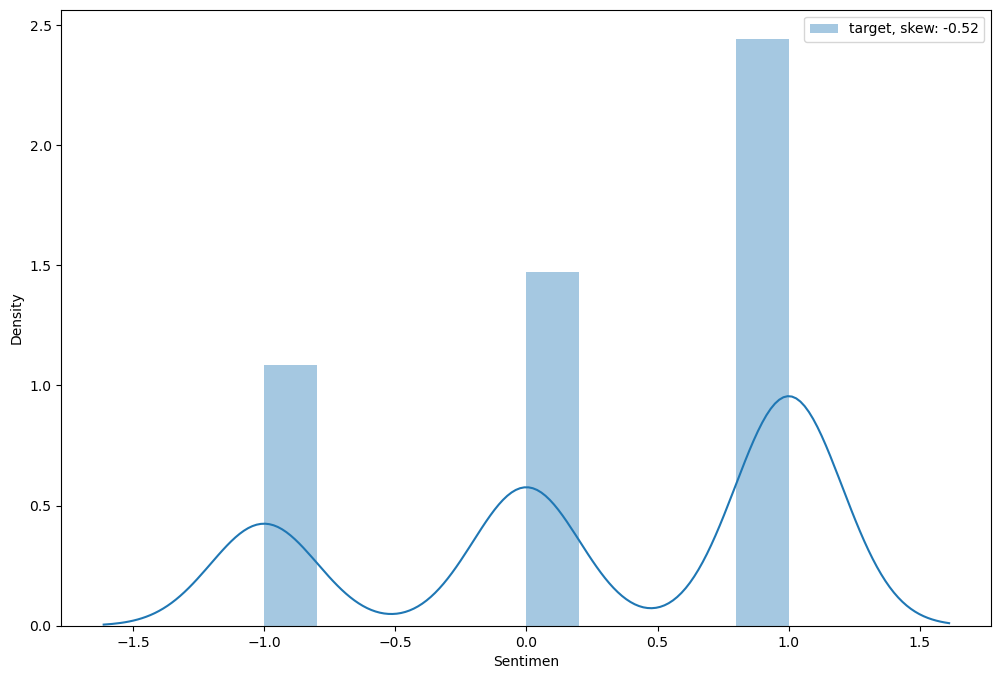

In [51]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [59]:
dataset_label.value_counts()

tweet
[USERNAME] Selamat Siang Sahabat Pos. Kiriman tsb sudah diterima ya sahabat. Terima kasih telah mempercayakan dan menggunakan layanan kami :) ^FD [URL]                                                                                                                                            4
All We Know of Heaven, All We Need of Hell - PVRIS (2017) Gue ngikutin PVRIS dari awal, gue rasa album yg skrg lagu2nya lebih mature, sangar, dark, tp fragile. Konsep keseluruhan album + mv + dll nya keren parah. W suka lagu Mercy, Anyone Else, sama Winter [URL]                             2
belajar agama yg tuntas jd nga ngarang dalam hidup. Isa saja disebut2 dialquran trus lu mau jelek2in Isa?? Bisa baca alquran ga? [URL]                                                                                                                                                             2
Aku gak salah bila mohon pd [USERNAME], segera Perintahkan MENKES utk menambah Ruangan Khusus "Sakit Jiwa" pd stiap

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [61]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [62]:
test_x

274     ya repeated allah repeated smoga number number...
3431    allcaps bajar orangtuamu allcaps repeated allc...
4021    hallo allcaps username allcaps mohon bantu ya ...
1027    gak sih situ mikir kalo ngerjain tugas gausah ...
1589    selamat pagi warga gunungkidul suasana pagi ka...
                              ...                        
3821    allcaps username allcaps nama kerja profesiona...
1551    habis giat yah hati jalan yah iya udah rumah i...
549     allcaps username allcaps allcaps username allc...
557     abis makan bumen makan sosis aliando blg udah ...
1829    gegara td malem treak treak gemash ngliat indo...
Name: ProcessedText, Length: 1321, dtype: object

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [66]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [67]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [68]:
classifier_nb.fit(train_x, train_label.ravel())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8280\4039834798.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classifier_nb.fit(train_x, train_label.ravel())
d:\STKI09\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
d:\STKI09\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
55 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\STKI09\venv\Li

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...inomialNB())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__alpha': (0.0001, ...), 'tfidf__ngram_range': [(1, ...), (1, ...), ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [70]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.999025974025974
Accuracy Test set:  0.001514004542013626


In [71]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.999025974025974
Recall Test set:  0.001514004542013626


d:\STKI09\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [72]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.998538961038961
Precision Test set:  0.000757002271006813


d:\STKI09\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\STKI09\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [73]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.9987012987012988
F1 Test set:  0.0010093363613424174


In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [70]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1))])

In [71]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 0.1
tfidf__ngram_range: (1, 1)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
train_x.dtype

dtype('O')

In [89]:
test_x_encoded = label_encoder.fit_transform(test_x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_x_encoded = label_encoder.fit_transform(train_x)

In [84]:
train_x_encoded.dtype

dtype('int64')

In [87]:
train_x_encoded = train_x_encoded.reshape(-1, 1)
# train_label = train_label.reshape(-1, 1)

In [90]:
test_x_encoded = test_x_encoded.reshape(-1, 1)

In [88]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_encoded, train_label)

KNeighborsClassifier(n_neighbors=3)

In [91]:
y_pred_knn_train = model.predict(train_x_encoded)
accuracy_knn_train = accuracy_score(train_label, y_pred_knn_train)
print("Accuracy Training set: ", accuracy_knn_train)

y_pred_knn_test = model.predict(test_x_encoded)
accuracy_knn_test = accuracy_score(test_label, y_pred_knn_test)
print("Accuracy Test set: ", accuracy_knn_test)

Accuracy Training set:  0.6819620253164557
Accuracy Test set:  0.36162361623616235


In [92]:
recall_knn_train = recall_score(train_label, y_pred_knn_train, average='weighted')
print("Recall Training set: ", recall_knn_train)

recall_knn_test = recall_score(test_label, y_pred_knn_test, average='weighted')
print("Recall Test set: ", recall_knn_test)

Recall Training set:  0.6819620253164557
Recall Test set:  0.36162361623616235


In [93]:
precision_knn_train = precision_score(train_label, y_pred_knn_train, average='weighted')
print("Precision Training set: ", precision_knn_train)

precision_knn_test = precision_score(test_label, y_pred_knn_test, average='weighted')
print("Precision Test set: ", precision_knn_test)

Precision Training set:  0.7011272070435527
Precision Test set:  0.39319546180536435


In [94]:
f1_knn_train = f1_score(train_label, y_pred_knn_train, average='weighted')
print("F1 Training set: ", f1_knn_train)

f1_knn_test = f1_score(test_label, y_pred_knn_test, average='weighted')
print("F1 Test set: ", f1_knn_test)

F1 Training set:  0.6865068520468985
F1 Test set:  0.3717346622765151


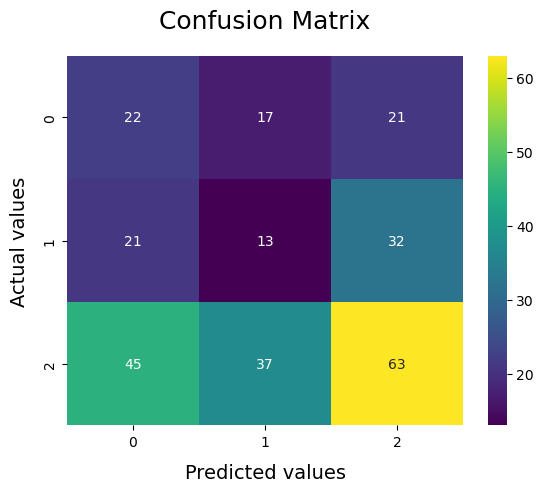

In [95]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [96]:
models = [        
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
         ]

In [97]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.976266,0.590406
1,KNN,0.681962,0.361624


In [98]:
models_comparison = [                        
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test),
                        ('KNN', accuracy_knn_test, recall_knn_test, precision_knn_test, f1_knn_test),                   
                    ]

In [99]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.590406,0.590406,0.569541,0.572316
1,KNN,0.361624,0.361624,0.393195,0.371735


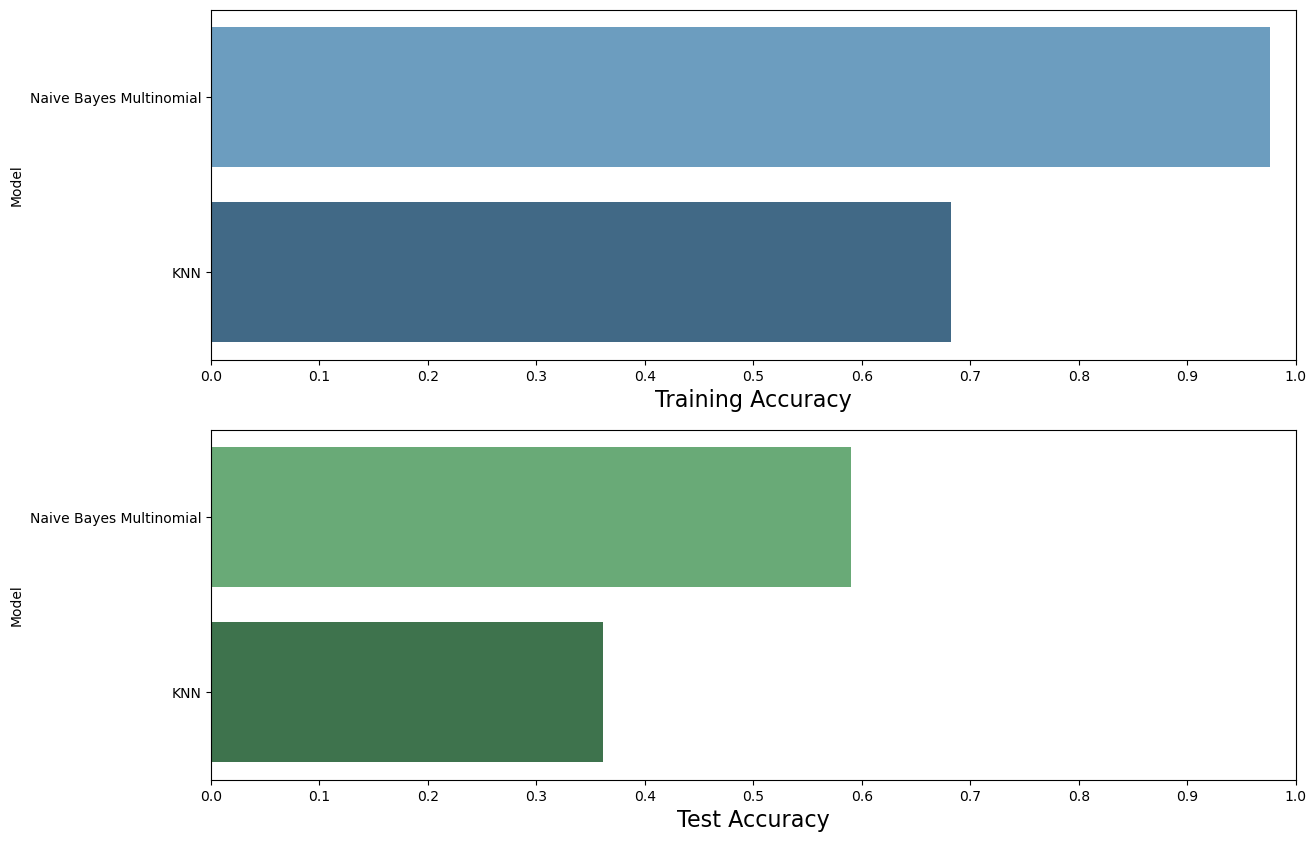

In [100]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [103]:
import joblib

In [104]:
# save the model to disk
joblib.dump(classifier_nb.best_estimator_, 'classifier_nb.best_estimator_.sav', compress=1)

['classifier_nb.best_estimator_.sav']